In [2]:
import re 
from dataclasses import dataclass
from aocd import get_data, submit
from collections import defaultdict 
import networkx as nx

@dataclass
class Valve:
    valve: str
    rate: int
    neighbours: list
        
data = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
   
data = get_data(year=2022, day=16)

data=data.splitlines()

nodes = []
for line in data:
    node = re.findall("Valve ([A-Z]*) ", line)[0]
    rate = int(re.findall("rate=([\d]*);", line)[0])
    neighbours = [n[1:].strip() for n in line.split("valve")[1].split(",")]
    nodes.append(Valve(node, rate, neighbours))
nodes

[Valve(valve='EV', rate=0, neighbours=['WG', 'IB']),
 Valve(valve='IB', rate=0, neighbours=['EW', 'EV']),
 Valve(valve='KL', rate=0, neighbours=['JH', 'OY']),
 Valve(valve='QJ', rate=0, neighbours=['TX', 'JH']),
 Valve(valve='OA', rate=12, neighbours=['SB', 'GI', 'ED']),
 Valve(valve='BQ', rate=0, neighbours=['NK', 'JJ']),
 Valve(valve='PZ', rate=0, neighbours=['JH', 'VA']),
 Valve(valve='QO', rate=8, neighbours=['LN', 'LU', 'CU', 'SQ', 'YZ']),
 Valve(valve='MP', rate=0, neighbours=['LN', 'GO']),
 Valve(valve='YZ', rate=0, neighbours=['AA', 'QO']),
 Valve(valve='CU', rate=0, neighbours=['RY', 'QO']),
 Valve(valve='UE', rate=16, neighbours=['VP']),
 Valve(valve='HT', rate=0, neighbours=['AA', 'JE']),
 Valve(valve='EF', rate=0, neighbours=['ES', 'JE']),
 Valve(valve='JJ', rate=15, neighbours=['BQ']),
 Valve(valve='JX', rate=0, neighbours=['AA', 'GO']),
 Valve(valve='AA', rate=0, neighbours=['JX', 'TX', 'HT', 'YZ']),
 Valve(valve='MI', rate=21, neighbours=['PQ', 'QT']),
 Valve(valve='ES',

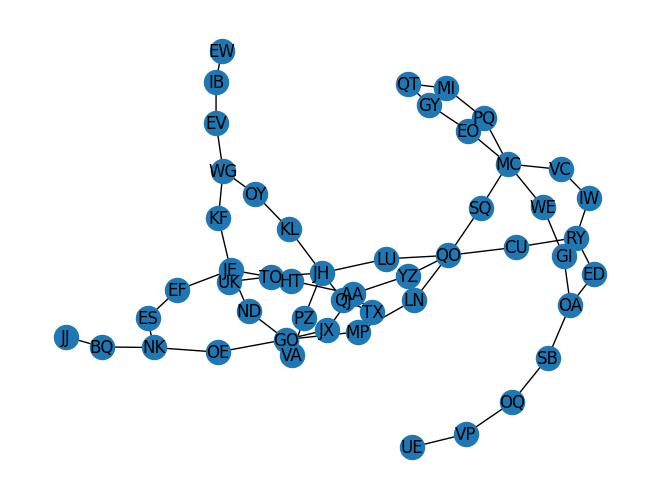

In [3]:
g = defaultdict()
for node in nodes:
    g[node.valve] = {neigh: {} for neigh in node.neighbours}
g = dict(g)
G = nx.from_dict_of_dicts(g)
nx.draw(G, with_labels=True)

In [4]:
simple_dict = {node.valve:node.neighbours for node in nodes}
useful_nodes = [node.valve for node in nodes if node.rate > 0]
flowrate = {node.valve:node.rate for node in nodes}

In [16]:
print_debug = lambda s: print(s) if DEBUG else None

def simulate_paths(N_MINUTES):
    best_paths = defaultdict(dict)
    best_paths["AA"] = {"": 0}
    DEBUG = False
    open_valves_flowrate = defaultdict(int)
    open_valves_stepcount = {}

    # iterate until map doesn't change anymore
    i = 0
    while True:
        converged = True
        print(f"*** ROUND {i} ***")
        new_best_paths = best_paths.copy()
        # for each node, check all possible ordered combinations of open valves to get to that node
        for node, options in best_paths.items():
            print_debug(f"Visiting {node}")

            # open_valves is an ordered combination of opened valves, best_stepcount is 
            # minimal stepcount to open those valves and get to the current node
            for open_valves, best_stepcount in options.items():
                if best_stepcount > N_MINUTES:
                    continue
                neighbours = simple_dict[node]
                for neigh in neighbours:
                    print_debug(f"{i}, best_stepcount: {best_stepcount}, Open valves: {open_valves}, Neighbour: {neigh}")
                    # check if we're actually making an improvement here, same order but fewer steps
                    if (open_valves in new_best_paths[neigh]) and (new_best_paths[neigh][open_valves] <= best_stepcount+1):
                        continue
                    # traveling to the next valve takes one time unit
                    new_best_paths[neigh][open_valves] = best_stepcount+1
                    converged = False

            # for all combinations, add opening current valve as an option
            for open_valves in list(options.keys()):
                # if we haven't opened the valve yet, open it and add it to the list of possibilities
                new_open_valves = open_valves + node + ","
                if (node in useful_nodes) and (node not in open_valves):
                    print_debug("> Opening valve")
                    new_open_valves = open_valves + node + ","
                    new_stepcount = new_best_paths[node][open_valves]+1
                    new_best_paths[node][new_open_valves] = new_stepcount
                    flowrate_added = flowrate[node] * max(0, N_MINUTES-new_stepcount)
                    print_debug(f"Adding {flowrate_added} at node {node} ({new_open_valves}) with stepcount {new_stepcount}")
                    new_flowrate = open_valves_flowrate[open_valves] + flowrate_added
                    open_valves_flowrate[new_open_valves] = new_flowrate

                    open_valves_stepcount[new_open_valves] = new_stepcount
            if len(new_best_paths[node]) != len(best_paths[node]):
                converged = False
        if converged:
            print("DONE!")
            break
        else:
            i += 1

        best_paths = new_best_paths
        
    return best_paths, open_valves_flowrate

In [17]:
best_paths, open_valves_flowrate = simulate_paths(30)
answer = max(open_valves_flowrate.values())
answer

*** ROUND 0 ***
*** ROUND 1 ***
*** ROUND 2 ***
*** ROUND 3 ***
*** ROUND 4 ***
*** ROUND 5 ***
*** ROUND 6 ***
*** ROUND 7 ***
*** ROUND 8 ***
*** ROUND 9 ***
*** ROUND 10 ***
*** ROUND 11 ***
*** ROUND 12 ***
*** ROUND 13 ***
*** ROUND 14 ***
*** ROUND 15 ***
*** ROUND 16 ***
*** ROUND 17 ***
*** ROUND 18 ***
*** ROUND 19 ***
*** ROUND 20 ***
*** ROUND 21 ***
*** ROUND 22 ***
*** ROUND 23 ***
*** ROUND 24 ***
*** ROUND 25 ***
*** ROUND 26 ***
*** ROUND 27 ***
*** ROUND 28 ***
*** ROUND 29 ***
DONE!


1767

In [18]:
submit(answer, year=2022, day=16, part="a")

Part a already solved with same answer: 1767


In [19]:
# Probably with some clever tricks we wouldn't need to run this twice
# but could instead just filter the old results based on stepcount and recalculate 
# the flow rate. But don't feel like doing that anymore
best_paths, open_valves_flowrate = simulate_paths(26)

*** ROUND 0 ***
*** ROUND 1 ***
*** ROUND 2 ***
*** ROUND 3 ***
*** ROUND 4 ***
*** ROUND 5 ***
*** ROUND 6 ***
*** ROUND 7 ***
*** ROUND 8 ***
*** ROUND 9 ***
*** ROUND 10 ***
*** ROUND 11 ***
*** ROUND 12 ***
*** ROUND 13 ***
*** ROUND 14 ***
*** ROUND 15 ***
*** ROUND 16 ***
*** ROUND 17 ***
*** ROUND 18 ***
*** ROUND 19 ***
*** ROUND 20 ***
*** ROUND 21 ***
*** ROUND 22 ***
*** ROUND 23 ***
*** ROUND 24 ***
*** ROUND 25 ***
*** ROUND 26 ***
DONE!


In [20]:
best_flowrate_valves = {}

for valves, total_flow in open_valves_flowrate.items():
    valves = valves.split(",")
    valves = [v for v in valves if v]
    valves.sort()
    valves = ",".join(valves)

    if valves in best_flowrate_valves:
        if total_flow > best_flowrate_valves[valves]:
            best_flowrate_valves[valves] = total_flow
    else: 
        best_flowrate_valves[valves] = total_flow
        

In [21]:
from itertools import combinations
useful_set = set(useful_nodes)

def set_to_str(p): 
    p = list(p)
    p.sort();
    return ",".join(p)

def get_best_effort_elephant(possible_valves_elephant, best_flowrate_valves):
    if not possible_valves_elephant:
        return 0
    best_flows_n = []
    max_n_valves_elephant = len(possible_valves_elephant)
    for n_valves_elephant in range(max_n_valves_elephant, 0, -1):

        options_elephant = [set_to_str(valves) for valves in combinations(possible_valves_elephant, n_valves_elephant) 
                            if set_to_str(valves) in best_flowrate_valves]
        flows_elephant = [best_flowrate_valves[valves] for valves in options_elephant]
        if not flows_elephant: 
            continue
        best_flow = max(flows_elephant)
        best_flows_n.append(best_flow)
    return max(best_flows_n)

scores = []
i = 0
for valves_you_set, flow_you in best_flowrate_valves.items():
    i += 1
    valves_you_set = set(valves_you_set.split(","))
    possible_valves_elephant = useful_set - valves_you_set

    flow_elephant = get_best_effort_elephant(possible_valves_elephant, best_flowrate_valves)

    scores.append(flow_you + flow_elephant)
               

0
1000
2000
3000
4000
5000
6000


In [23]:
answer = max(scores)
answer

2528

In [24]:
submit(answer, year=2022, day=16, part="b")

Part b already solved with same answer: 2528
